In [5]:
import os
import pandas as pd
import numpy as np

In [6]:
os.getcwd()

'/Users/caseyh/Desktop/footyfootyfooty/data_wrangling'

In [9]:
df = pd.read_csv('/Users/caseyh/Desktop/footyfootyfooty/player_stats/2022_player_stats.csv')

In [13]:
df['player_key'] = df['Player'] + '_' +  df['team']

In [27]:
team_stats = df.groupby(['team','round','opponent','year']).sum().reset_index()

In [28]:
team_stats['point scored'] = 6 * team_stats['Goals'] + team_stats['Behinds']

In [29]:
team_stats['accuracy'] = team_stats['Goals']/(team_stats['Goals'] + team_stats['Behinds'])

In [35]:
opp = team_stats.groupby(['year','opponent']).mean().reset_index()

In [36]:
team = team_stats.groupby(['year','team']).mean().reset_index()

In [39]:
tmp = team.merge(opp, left_on='team', right_on='opponent', suffixes=['_team','_opp'])

In [40]:
tmp['difference'] = tmp['point scored_team'] - tmp['point scored_opp'] 

In [42]:
tmp.sort_values('difference', ascending=False)

,year_team,team,Disposals_team,Kicks_team,Handballs_team,Goals_team,Behinds_team,Marks_team,Clearances_team,Tackles_team,...,Frees Against_opp,Inside 50s_opp,Rebounds_opp,Clangers_opp,One Percenters_opp,Bounces_opp,Brownlow Votes_opp,point scored_opp,accuracy_opp,difference
7,2022,GEE,374.320000,219.880000,154.440000,14.360000,10.080000,97.640000,37.600000,58.280000,...,19.840000,44.920000,42.480000,61.520000,44.080000,4.960000,1.600000,64.600000,0.622704,31.640000
13,2022,RCH,352.217391,214.043478,138.173913,14.521739,9.000000,89.565217,33.695652,50.000000,...,18.739130,52.391304,41.739130,61.173913,47.956522,5.478261,2.478261,79.521739,0.571385,16.608696
10,2022,MEL,366.333333,213.708333,152.625000,12.500000,9.083333,86.416667,37.916667,56.458333,...,18.625000,48.833333,42.875000,61.500000,56.541667,4.833333,1.583333,67.833333,0.560202,16.250000
15,2022,SYD,350.680000,222.160000,128.520000,13.440000,9.520000,93.320000,37.480000,64.920000,...,20.440000,50.880000,40.360000,57.800000,46.400000,4.320000,1.960000,74.320000,0.575697,15.840000
1,2022,BRL,346.320000,224.120000,122.200000,14.240000,8.520000,94.800000,39.760000,57.280000,...,21.200000,51.800000,40.760000,60.440000,50.360000,5.640000,2.320000,81.960000,0.592577,12.000000
5,2022,FRE,383.333333,218.541667,164.791667,11.291667,8.166667,94.583333,37.833333,57.916667,...,20.041667,50.000000,39.541667,59.833333,51.750000,4.791667,2.041667,65.833333,0.564489,10.083333
12,2022,POR,381.636364,224.818182,156.818182,11.863636,9.000000,96.136364,38.090909,60.045455,...,18.818182,50.045455,40.000000,59.090909,48.818182,5.227273,2.636364,71.727273,0.547149,8.454545
2,2022,CAR,383.227273,227.090909,156.136364,12.181818,9.454545,96.227273,37.636364,55.954545,...,21.500000,51.500000,42.181818,61.318182,50.454545,5.409091,1.954545,75.636364,0.587903,6.909091
16,2022,WBD,377.260870,218.652174,158.608696,12.826087,9.000000,93.521739,40.000000,56.391304,...,20.521739,49.521739,42.043478,57.565217,45.391304,4.739130,2.478261,80.217391,0.600256,5.739130
3,2022,COL,349.800000,209.400000,140.400000,12.120000,8.040000,81.880000,35.160000,63.440000,...,20.360000,52.560000,41.360000,66.520000,49.640000,3.560000,2.760000,77.680000,0.617977,3.080000


In [43]:
import seaborn as sns

<AxesSubplot:xlabel='Goals_team', ylabel='Inside 50s_team'>

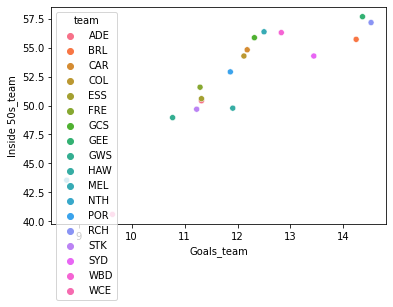

In [50]:
sns.scatterplot(x = 'Goals_team',y = 'Inside 50s_team',hue='team',data = tmp)

<AxesSubplot:xlabel='Kicks', ylabel='Disposals'>

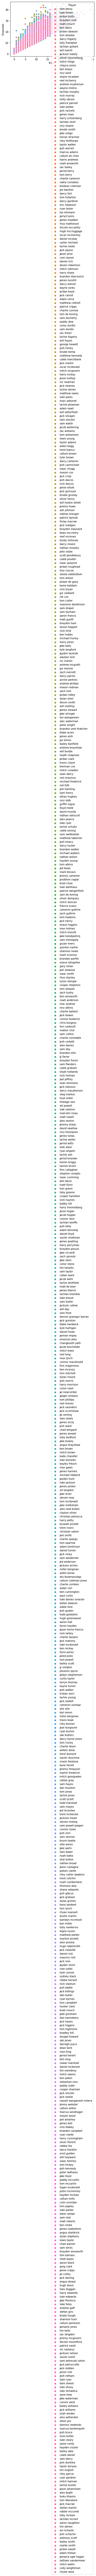

In [51]:
sns.scatterplot(x = 'Kicks',y = 'Disposals',hue='Player',data = df)